In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Q8. Can we predict the type of heating (Heating) in a property based on its age (YrSold - YearBuilt) and the type of foundation (Foundation)?

In [9]:
df = pd.read_csv(
    './../DataFiles/house-prices-advanced-regression-techniques/train.csv')

In [10]:
# Impute null values in LotFrontage column with the mean
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

# Replace null values in Alley column with a new category "No alley access"
df["Alley"].fillna("No alley access", inplace=True)

# Impute null values in MasVnrType and MasVnrArea columns with the mode and median respectively
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

# Replace null values in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2 columns with a new category "No basement"
basement_cols = ["BsmtQual", "BsmtCond",
                 "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    df[col].fillna("No basement", inplace=True)

# Impute null value in Electrical column with the mode
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

# Replace null values in FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond columns with a new category "No fireplace" or "No garage"
fireplace_cols = ["FireplaceQu"]
garage_cols = ["GarageType", "GarageYrBlt",
               "GarageFinish", "GarageQual", "GarageCond"]
for col in fireplace_cols:
    df[col].fillna("No fireplace", inplace=True)
for col in garage_cols:
    df[col].fillna("No garage", inplace=True)

# Replace null values in PoolQC, Fence, and MiscFeature columns with a new category "No pool", "No fence", or "No miscellaneous feature"
df["PoolQC"].fillna("No pool", inplace=True)
df["Fence"].fillna("No fence", inplace=True)
df["MiscFeature"].fillna("No miscellaneous feature", inplace=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,12,2008,WD,Normal,250000


In [11]:
df['Age'] = df['YrSold'] - df['YearBuilt']
X = df[['Age', 'Foundation']]
y = df['Heating']

In [12]:
le = LabelEncoder()
X['Foundation'] = le.fit_transform(X['Foundation'])
y = le.fit_transform(y)


/tmp/ipykernel_10924/279627260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Foundation'] = le.fit_transform(X['Foundation'])


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/ziad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print(f"Accuracy = {accuracy}")

Accuracy = 0.9840182648401826


In [18]:
print(f"Confusion Matrix")
confusion_matrix

Confusion Matrix


array([[431,   0,   0,   0],
       [  3,   0,   0,   0],
       [  3,   0,   0,   0],
       [  1,   0,   0,   0]])

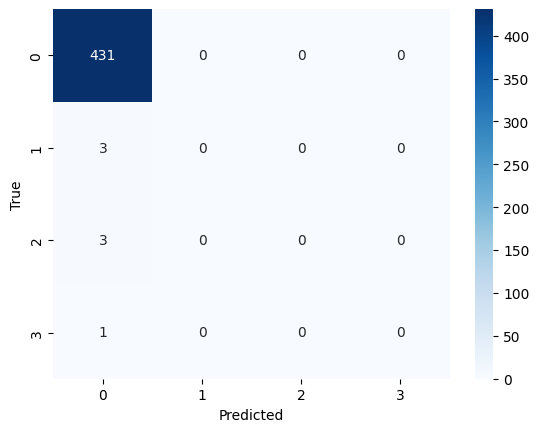

In [19]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
df.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

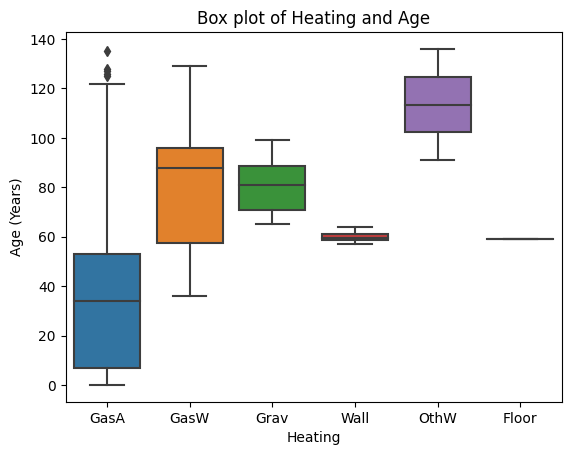

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Heating", y="Age", data=df)
plt.title("Box plot of Heating and Age")
plt.xlabel("Heating")
plt.ylabel("Age (Years)")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Filter out samples with GasA as heating type
df_filtered = df[df['Heating'] != 'GasA']

# Prepare the features and target variables
X = df_filtered[['Age', 'Foundation']]
y = df_filtered['Heating']

le = LabelEncoder()
X['Foundation'] = le.fit_transform(X['Foundation'])
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

/tmp/ipykernel_10924/3900446274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Foundation'] = le.fit_transform(X['Foundation'])
/home/ziad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


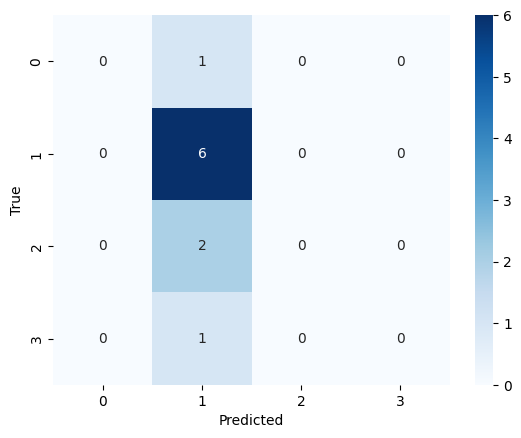

In [23]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Answer:
------------
We Cannot Predict the Heating Based on the Age due to the huge value_counts of the Heating and the Age is not a good feature to predict the Heating

The Final Answer is no, cannot be predicted based on the Age